In [2]:
from minisom import MiniSom
import numpy as np
import pandas as pd

##https://github.com/JustGlowing/minisom/blob/master/examples/Clustering.ipynb

In [7]:
### otherwise download the data to the folder you are running your jupyter notebook in and run this code
dataIN = pd.read_csv('iris.data.csv',
    header=None,
    sep=',')

dataIN.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
dataIN.dropna(how="all", inplace=True) # drops the empty line at file-end

## print a bit about the data
print(np.shape(dataIN))
dataIN.head()
#dataIN.tail()

data=dataIN.iloc[:,0:4].values
print(data.shape)

# standardize the data 
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

(150, 5)
(150, 4)


In [9]:
# Initialization and training
som_shape = (1, 3)
som = MiniSom(som_shape[0], som_shape[1], data.shape[1], sigma=.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

som.train_batch(data, 500, verbose=True)

 [ 500 / 500 ] 100% - 0:00:00 left 
 quantization error: 0.922572809399322


In [10]:
# each neuron represents a cluster
winner_coordinates = np.array([som.winner(x) for x in data]).T
print(winner_coordinates.shape)
print(som_shape)

# with np.ravel_multi_index we convert the bidimensional
# coordinates to a monodimensional index
cluster_index = np.ravel_multi_index(winner_coordinates, som_shape)
print(cluster_index.shape)

cluster_index=winner_coordinates[1,:]

(2, 150)
(1, 3)
(150,)


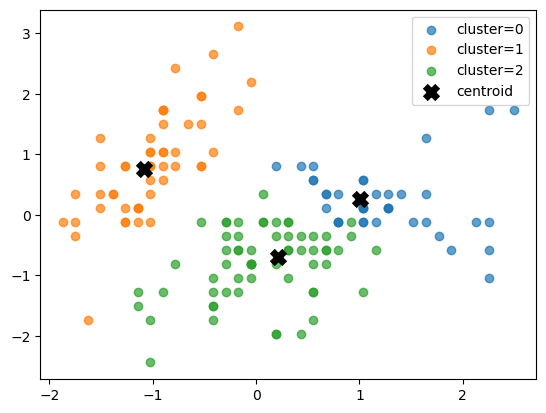

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

# plotting the clusters using the first 2 dimentions of the data
for c in np.unique(cluster_index):
    plt.scatter(data[cluster_index == c, 0],
                data[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plotting centroids
for centroid in som.get_weights():
    plt.scatter(centroid[:, 0], centroid[:, 1], marker='x', 
                s=80, linewidths=5, color='k', label='centroid')
plt.legend();